In [1]:
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import string
import pandas as pd
import glob 
import os
import random
import librosa
import IPython
import librosa.display
import numpy as np

In [2]:
file_name = os.path.join("SSPNet-Speaker-Personality-Corpus/Audio_clips", 'cut_feb0101-guest-0-2' + '.wav')

In [3]:
y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=8000,mono=True) 
IPython.display.Audio(file_name)

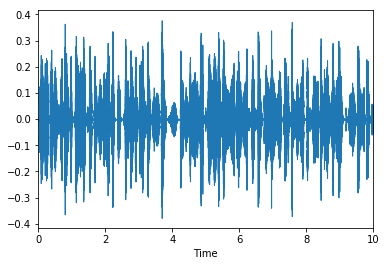

In [4]:
librosa.display.waveplot(y, sr=sample_rate)

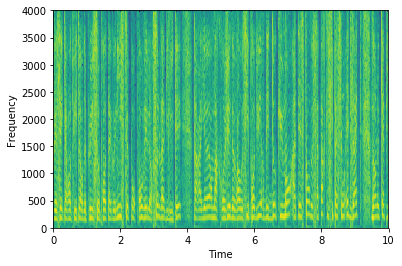

[array([[3.34385149e-10, 8.66581110e-10, 3.41767238e-09, ...,
        1.95839386e-08, 6.32086944e-10, 4.80939121e-10],
       [5.84790865e-10, 8.13077783e-10, 4.52593036e-09, ...,
        1.46440579e-07, 1.42995892e-08, 4.60247063e-09],
       [1.46836069e-10, 4.74724010e-09, 2.13723770e-09, ...,
        1.58938036e-07, 3.23358857e-09, 3.49723763e-09],
       ...,
       [9.80142605e-11, 3.98215434e-09, 4.06068961e-10, ...,
        1.43532361e-09, 8.95640851e-09, 7.27090004e-08],
       [1.18332133e-10, 8.11711113e-11, 7.00681477e-09, ...,
        2.19750808e-08, 5.52253299e-08, 2.50911947e-08],
       [4.91782923e-11, 1.38827274e-10, 1.21590126e-08, ...,
        4.24831750e-08, 1.05000025e-10, 1.50292920e-14]])
 array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.7

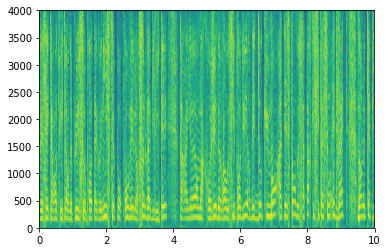

In [15]:
plt.specgram(y, Fs=sample_rate)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
fig.savefig('spec.png')



(array([[3.34385149e-10, 8.66581110e-10, 3.41767238e-09, ...,
        1.95839386e-08, 6.32086944e-10, 4.80939121e-10],
       [5.84790865e-10, 8.13077783e-10, 4.52593036e-09, ...,
        1.46440579e-07, 1.42995892e-08, 4.60247063e-09],
       [1.46836069e-10, 4.74724010e-09, 2.13723770e-09, ...,
        1.58938036e-07, 3.23358857e-09, 3.49723763e-09],
       ...,
       [9.80142605e-11, 3.98215434e-09, 4.06068961e-10, ...,
        1.43532361e-09, 8.95640851e-09, 7.27090004e-08],
       [1.18332133e-10, 8.11711113e-11, 7.00681477e-09, ...,
        2.19750808e-08, 5.52253299e-08, 2.50911947e-08],
       [4.91782923e-11, 1.38827274e-10, 1.21590126e-08, ...,
        4.24831750e-08, 1.05000025e-10, 1.50292920e-14]]), array([   0.  ,   31.25,   62.5 ,   93.75,  125.  ,  156.25,  187.5 ,
        218.75,  250.  ,  281.25,  312.5 ,  343.75,  375.  ,  406.25,
        437.5 ,  468.75,  500.  ,  531.25,  562.5 ,  593.75,  625.  ,
        656.25,  687.5 ,  718.75,  750.  ,  781.25,  812.5 ,  843.7

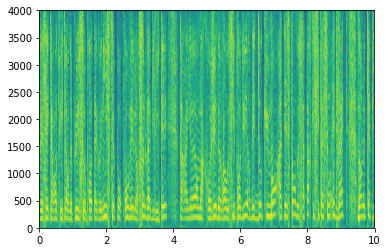

In [6]:
data=plt.specgram(y, Fs=sample_rate)
print(data)

In [7]:
def parser(file_name_x):
    file_name = file_name_x
    try:
        Y, sample_rate = librosa.load(file_name, res_type='kaiser_fast',sr=16000,mono=True) 
        pre_emphasis = 2
        X = np.append(Y[0], Y[1:] - pre_emphasis * Y[:-1])
        stft = np.abs(librosa.stft(X,n_fft=512,hop_length=168,win_length=500))
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=64).T,axis=0) 
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
        mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None
    
    return mfccs,mel,contrast,tonnetz

In [8]:
def feature():
    path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
    files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]
    features=np.empty((0,205))
    label=np.empty((0,1))
    for f in files[1:10]:
        mfccs,chroma,contrast,tonnetz=parser(f)
        print(mfccs.shape,chroma.shape,contrast.shape,tonnetz.shape)
        ext_features = np.hstack([mfccs,chroma,contrast,tonnetz])
        features = np.vstack([features,ext_features])
        label=np.vstack((label,1))

    return features,label

In [9]:
f,l=feature()

/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


(64,) (128,) (7,) (6,)
(64,) (128,) (7,) (6,)


/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:512: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not i.flags.writeable or i.dtype not in (np.int32, np.int64):
/usr/local/lib/python3.7/site-packages/scipy/sparse/lil.py:514: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not j.flags.writeable or j.dtype not in (np.int32, np.int64):


In [10]:
print(f.shape)

(9, 205)


In [11]:
path = 'SSPNet-Speaker-Personality-Corpus/Audio_clips'
files = [f for f in glob.glob(path + "**/*.wav", recursive=True)]

for f in files:
    print(f)

SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2302-human-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0303-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0103-guest-4-17.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0403-human-16.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0905-human-9.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1802-human-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1604-human-15.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1404-guest-5-20.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2403-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb0904-guest-4-21.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2404-human-22.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb2805-guest-1-14.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1603-guest-1-4.wav
SSPNet-Speaker-Personality-Corpus/Audio_clips/cut_feb1405-guest-1-6.wa

In [12]:
plt.specgram?

In [13]:
from sklearn.feature_extraction import image